In [18]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [50]:
import os
from collections import Counter

def preprocess_file(file_path):
    with open(file_path, 'r') as f:
        lines = f.readlines()

    commands = []
    for line in lines:
        # Split the line by spaces and ignore the address (first element)
        cmd_line = line.strip().split(' ')[1:]
        # Remove '??' and convert the hexadecimal bytes to integers
        cmd_line = [cmd for cmd in cmd_line if cmd != '??']
        commands.extend(cmd_line)

    return commands

In [55]:
def preprocess_all_files(directory_path, n):
    all_files_data = []
    all_files_n_gram = []

    for file_name in os.listdir(directory_path):
        file_path = os.path.join(directory_path, file_name)
        if os.path.isfile(file_path):
            file_data = preprocess_file(file_path)
            ngram_counts = extract_3gram_features(file_data, n)
            all_files_n_gram.append(ngram_counts)
            all_files_data.append(file_data)

    return all_files_data, all_files_n_gram

def extract_3gram_features(commands , n):
    ngrams = [tuple(commands[i:i+n]) for i in range(len(commands) - n - 1)]
    ngram_counts = Counter(ngrams)
    return ngram_counts



Accuracy: 0.0
Confusion Matrix:
 [[0 1 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 1 0]]
Classification Report:
               precision    recall  f1-score   support

           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       0.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       1.0

    accuracy                           0.00       2.0
   macro avg       0.00      0.00      0.00       2.0
weighted avg       0.00      0.00      0.00       2.0



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_cla

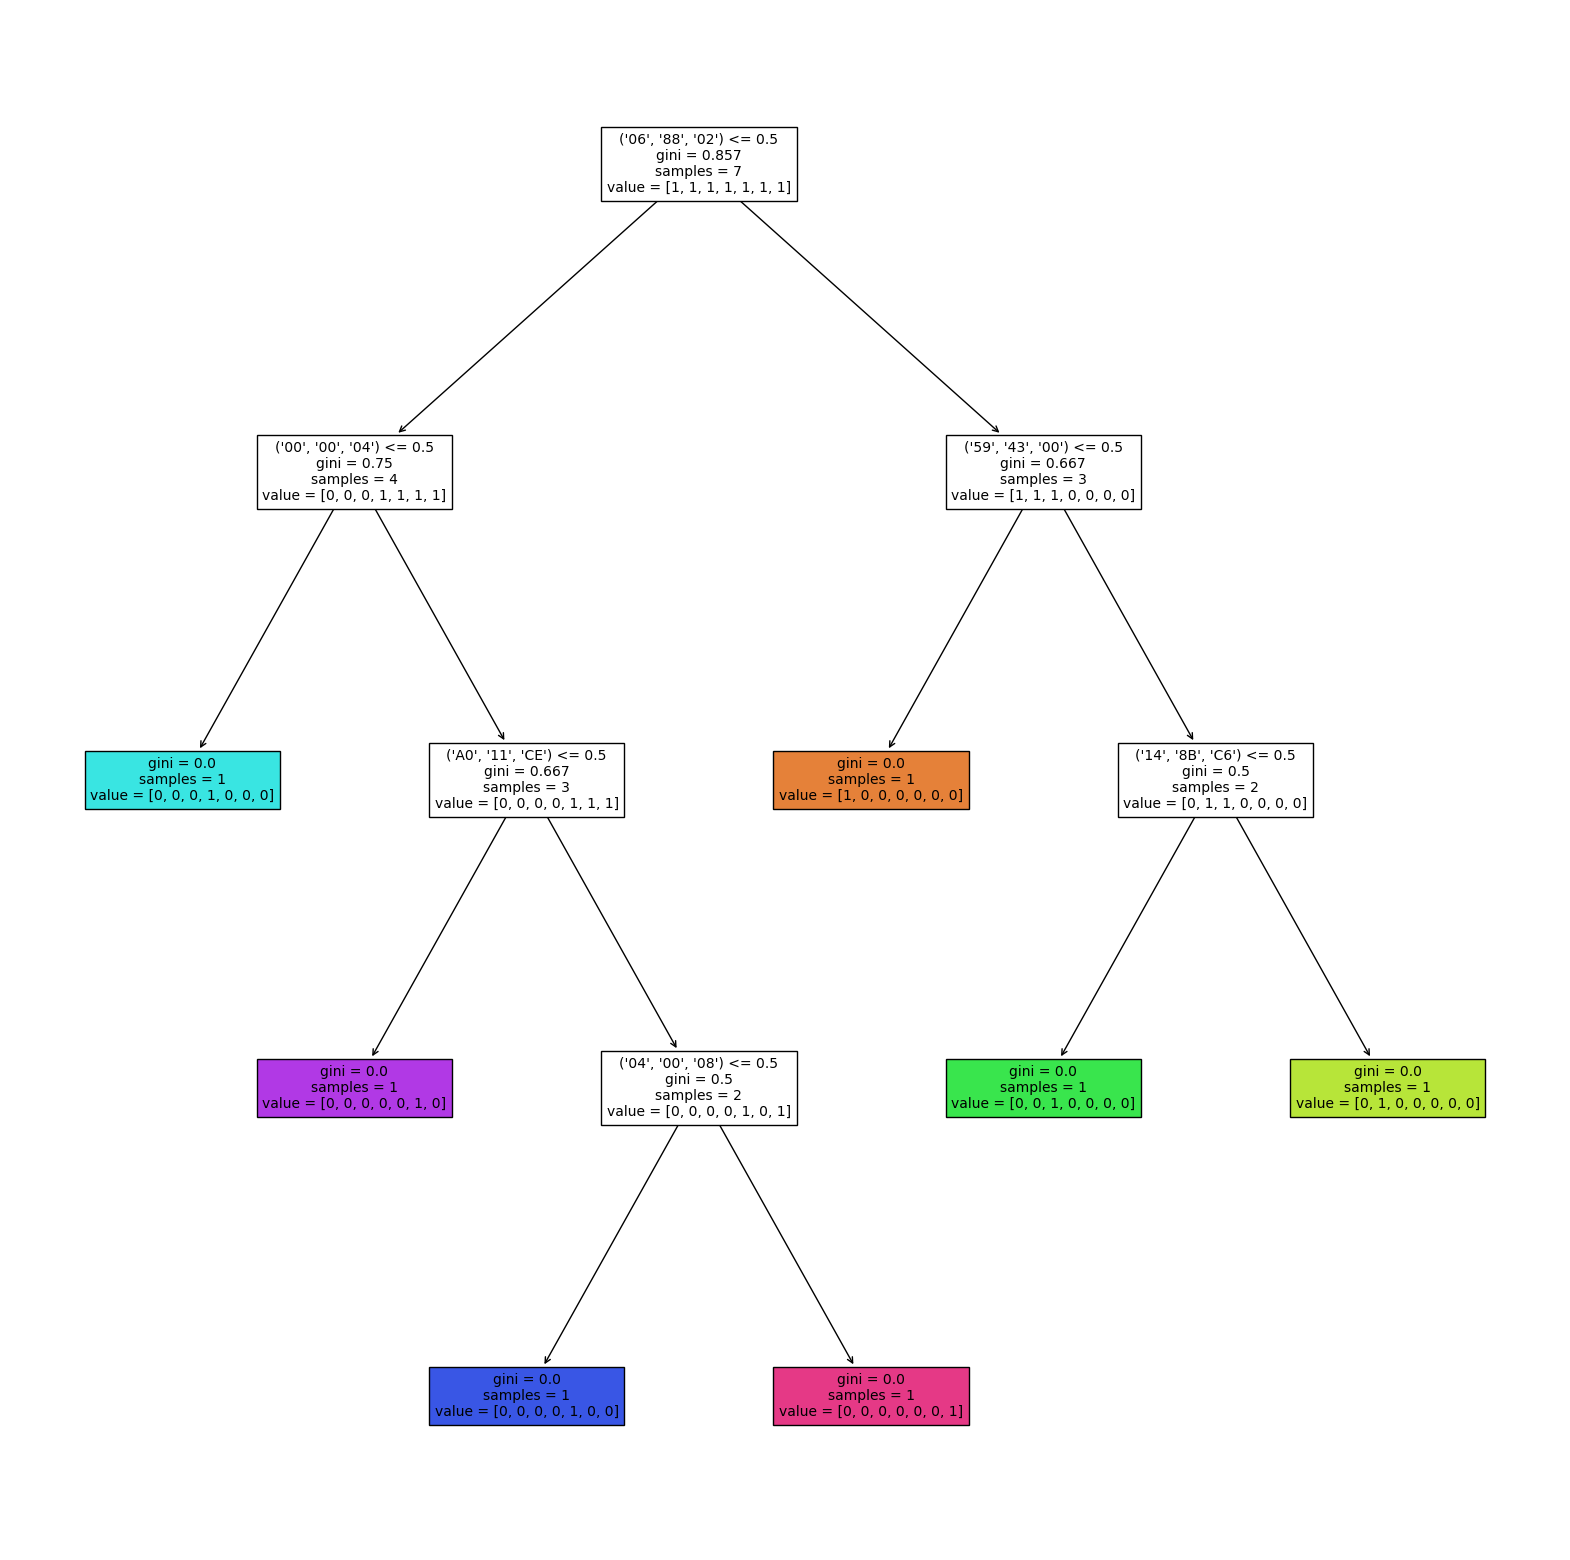

In [63]:
import os
from collections import Counter
from sklearn.feature_extraction import DictVectorizer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

labels = [1, 2, 3, 4, 5, 6, 7, 8, 9]  

#Apply preprocessing and n-gram extraction to the files:
n = 3
directory_path = 'C:/Users/shavarsh.shahoyan.HELPSYSTEMS/Desktop/YSUUUUUUU/2nd YEAR/Master thesis/DATA/dataSample'
_, all_files_n_gram = preprocess_all_files(directory_path, n)

#Vectorize the n-grams:
vectorizer = DictVectorizer(sparse=True)
X = vectorizer.fit_transform(all_files_n_gram)
y = labels

#Split the dataset into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#Train the Decision Tree classifier:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train, y_train)

#Evaluate the classifier:
y_pred = classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fig, ax = plt.subplots(figsize=(20, 20))  # Adjust the size of the figure as needed
plot_tree(classifier, ax=ax, feature_names=vectorizer.feature_names_, filled=True, fontsize=10)
plt.show()